In [1]:
%%capture

!pip install qiskit qiskit_ionq matplotlib pylatexenc

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import qiskit_ionq

from getpass import getpass

# get your API key from https://cloud.ionq.com/settings/keys
api_key = getpass('Enter your IonQ API key: ')
provider = qiskit_ionq.IonQProvider(api_key)
backend = provider.get_backend('ionq_simulator')

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

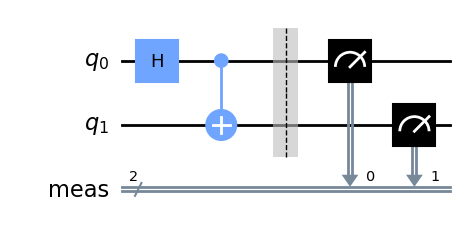

In [4]:
qc.draw('mpl')

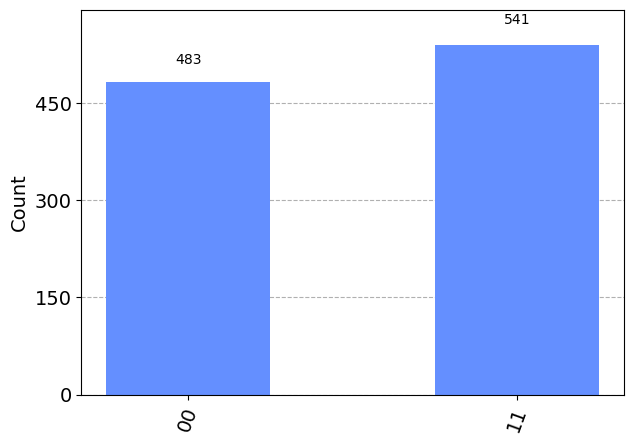

In [5]:
job = backend.run(qc)
plot_histogram(job.result().get_counts())